# Importing Dataset

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("loan_prediction.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


so we have 614 rows 13 columns 

# Null value calculation

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

so we have null value

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

we have mix of float and object types which i need to change

# Encoder processed

In [7]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [8]:
lencode=LabelEncoder()

In [9]:
df['Gender']=lencode.fit_transform(df['Gender'])
df['Loan_ID']=lencode.fit_transform(df['Loan_ID'])
df['Married']=lencode.fit_transform(df['Married'])
df['Dependents']=lencode.fit_transform(df['Dependents'])
df['Education']=lencode.fit_transform(df['Education'])
df['Self_Employed']=lencode.fit_transform(df['Self_Employed'])
df['Property_Area']=lencode.fit_transform(df['Property_Area'])
df['Loan_Status']=lencode.fit_transform(df['Loan_Status'])
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [10]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Null Value Treatment

In [11]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Eda Processing

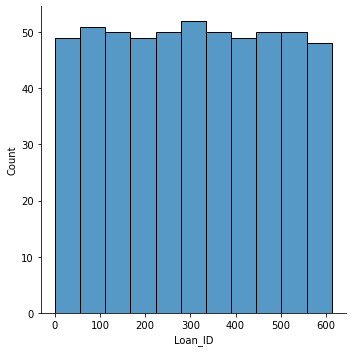

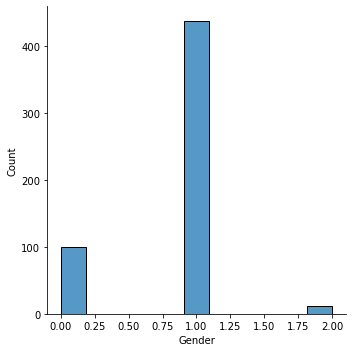

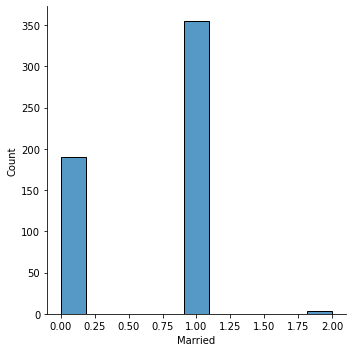

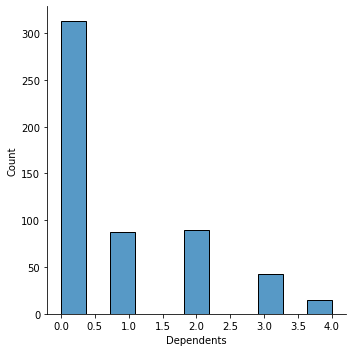

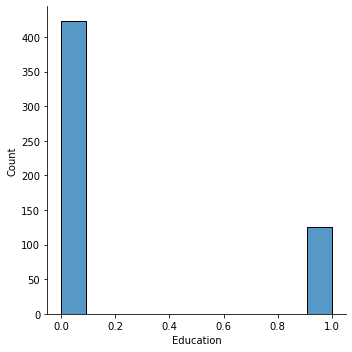

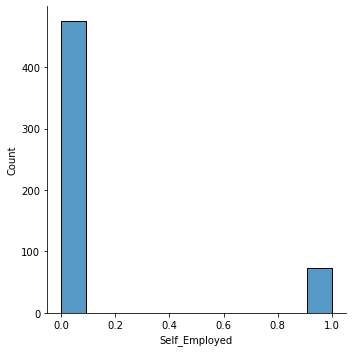

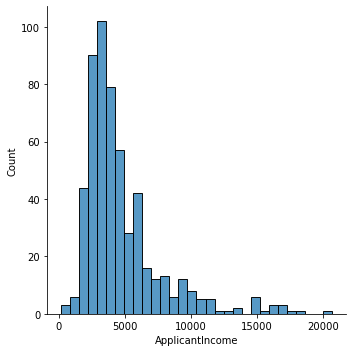

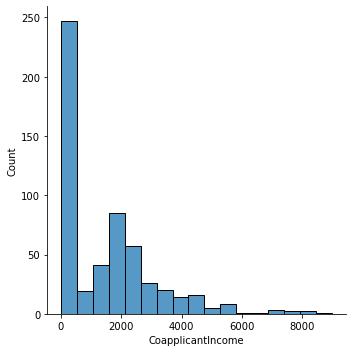

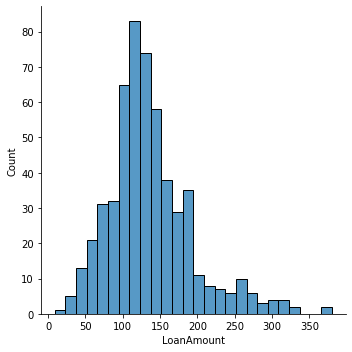

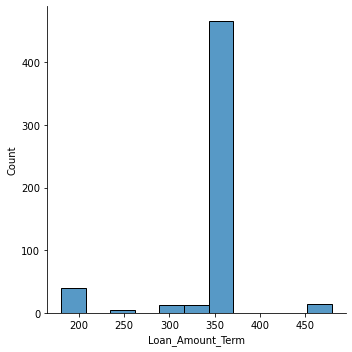

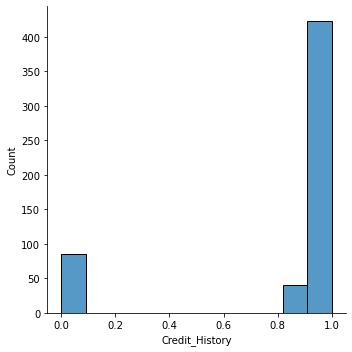

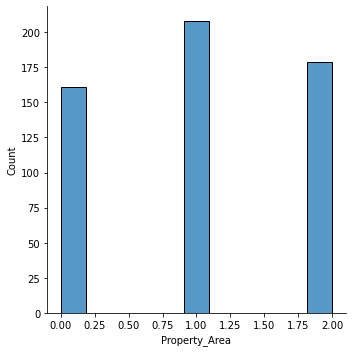

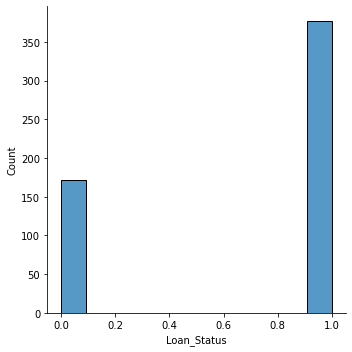

In [85]:
for i in df.columns:
    sns.displot(df[i])

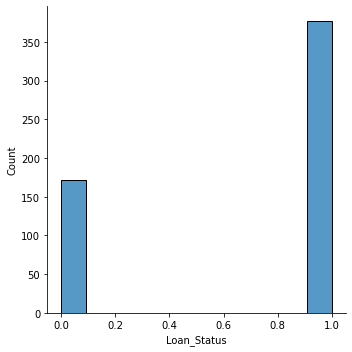

In [86]:
sns.displot(df['Loan_Status'])

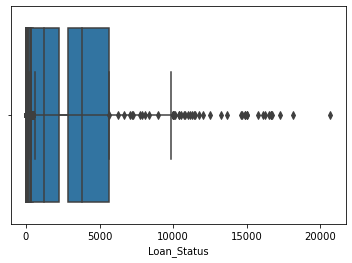

In [87]:
for i in df.columns:
    sns.boxplot(df[i])

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

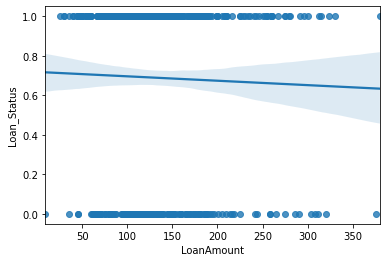

In [109]:
sns.regplot(x="LoanAmount",y="Loan_Status",data=df)

In [12]:
df.describe

<bound method NDFrame.describe of      Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0          0       1        0           0          0              0   
1          1       1        1           1          0              0   
2          2       1        1           0          0              1   
3          3       1        1           0          1              0   
4          4       1        0           0          0              0   
..       ...     ...      ...         ...        ...            ...   
609      609       0        0           0          0              0   
610      610       1        1           3          0              0   
611      611       1        1           1          0              0   
612      612       1        1           2          0              0   
613      613       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0 

after all the eda process there is outlier present we need to remove that

In [13]:
df.skew()

Loan_ID              0.000000
Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [14]:
import scipy
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  11,  14,  19,  24,  29,  30,  68,  94,  95, 107, 111, 114,
        126, 130, 133, 155, 155, 158, 170, 171, 171, 177, 177, 183, 185,
        218, 231, 236, 242, 262, 268, 278, 295, 308, 313, 333, 333, 333,
        336, 344, 369, 374, 380, 385, 402, 409, 411, 417, 432, 432, 443,
        447, 463, 468, 487, 495, 497, 506, 523, 525, 535, 542, 546, 561,
        575, 579, 581, 585, 600, 600, 601, 604], dtype=int64),
 array([7, 5, 9, 5, 5, 5, 5, 9, 9, 5, 5, 5, 5, 6, 8, 9, 6, 8, 5, 5, 6, 8,
        7, 8, 6, 6, 5, 5, 5, 9, 9, 5, 8, 5, 8, 9, 5, 6, 8, 5, 5, 8, 5, 5,
        5, 7, 6, 5, 7, 5, 8, 6, 5, 5, 5, 8, 9, 9, 8, 8, 8, 5, 5, 9, 8, 9,
        5, 7, 9, 5, 7, 5, 8], dtype=int64))

In [15]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [16]:
dataloss=((614-548)/614)*100
dataloss

10.749185667752444

In [98]:
df=df_new_z

In [107]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,0.024583,-0.010876,0.069358,0.039290,0.036154,0.042001,-0.059528,0.007527,-0.017784,-0.046613,-0.164043,0.008108
Gender,0.024583,1.000000,0.345894,0.158556,0.034202,0.023744,0.026755,0.189977,0.159188,-0.097345,0.007141,-0.033569,0.011524
Married,-0.010876,0.345894,1.000000,0.339199,0.023781,-0.023110,0.000328,0.220988,0.169818,-0.130005,0.026943,0.015007,0.102595
Dependents,0.069358,0.158556,0.339199,1.000000,0.077201,0.039380,0.088208,-0.047031,0.119121,-0.066204,-0.054665,0.030939,-0.005975
Education,0.039290,0.034202,0.023781,0.077201,1.000000,-0.008337,-0.168418,-0.042460,-0.150237,-0.105447,-0.087402,-0.050318,-0.103196
Self_Employed,0.036154,0.023744,-0.023110,0.039380,-0.008337,1.000000,0.248058,-0.040733,0.120558,-0.034400,-0.009342,-0.030009,-0.025740
ApplicantIncome,0.042001,0.026755,0.000328,0.088208,-0.168418,0.248058,1.000000,-0.213538,0.443894,-0.053087,0.053089,-0.009007,0.007848
CoapplicantIncome,-0.059528,0.189977,0.220988,-0.047031,-0.042460,-0.040733,-0.213538,1.000000,0.314699,-0.072115,-0.023867,-0.099388,0.038806
LoanAmount,0.007527,0.159188,0.169818,0.119121,-0.150237,0.120558,0.443894,0.314699,1.000000,0.030579,0.007955,-0.093593,-0.027363
Loan_Amount_Term,-0.017784,-0.097345,-0.130005,-0.066204,-0.105447,-0.034400,-0.053087,-0.072115,0.030579,1.000000,0.033791,-0.061149,-0.011024


# Heatmap 

<AxesSubplot:>

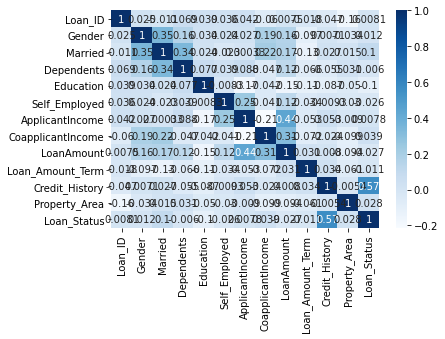

In [108]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

# Features and Target

In [99]:
features=df.drop("Loan_Status",axis=1)
target=df["Loan_Status"]

In [100]:
x= features
y=target

# Classification Process

In [101]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [102]:
svc=SVC(kernel='rbf')
svc.fit(xtrain,ytrain)
svc.score(xtrain,ytrain)
predsvc=svc.predict(xtest)
print(accuracy_score(ytest,predsvc))
print(confusion_matrix(ytest,predsvc))
print(classification_report(ytest,predsvc))

0.7212121212121212
[[  0  46]
 [  0 119]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.72      1.00      0.84       119

    accuracy                           0.72       165
   macro avg       0.36      0.50      0.42       165
weighted avg       0.52      0.72      0.60       165



In [103]:
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
dtc.score(xtrain,ytrain)
preddtc=dtc.predict(xtest)
print(accuracy_score(ytest,preddtc))
print(confusion_matrix(ytest,preddtc))
print(classification_report(ytest,preddtc))

0.7212121212121212
[[20 26]
 [20 99]]
              precision    recall  f1-score   support

           0       0.50      0.43      0.47        46
           1       0.79      0.83      0.81       119

    accuracy                           0.72       165
   macro avg       0.65      0.63      0.64       165
weighted avg       0.71      0.72      0.71       165



In [104]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
knn.score(xtrain,ytrain)
predknn=knn.predict(xtest)
print(accuracy_score(ytest,predknn))
print(confusion_matrix(ytest,predknn))
print(classification_report(ytest,predknn))

0.5757575757575758
[[14 32]
 [38 81]]
              precision    recall  f1-score   support

           0       0.27      0.30      0.29        46
           1       0.72      0.68      0.70       119

    accuracy                           0.58       165
   macro avg       0.49      0.49      0.49       165
weighted avg       0.59      0.58      0.58       165



In [105]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=55)

In [106]:
svc=SVC(kernel='poly')
svc.fit(xtrain,ytrain)
svc.score(xtrain,ytrain)
predsvc=svc.predict(xtest)
print(accuracy_score(ytest,predsvc))
print(confusion_matrix(ytest,predsvc))
print(classification_report(ytest,predsvc))

0.7212121212121212
[[  0  46]
 [  0 119]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.72      1.00      0.84       119

    accuracy                           0.72       165
   macro avg       0.36      0.50      0.42       165
weighted avg       0.52      0.72      0.60       165



In [96]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(xtrain,ytrain)
    svc.score(xtrain,ytrain)
    predsvc=svc.predict(xtest)
    print(accuracy_score(ytest,predsvc))
    print(confusion_matrix(ytest,predsvc))
    print(classification_report(ytest,predsvc))

In [97]:
svmkernel('rbf')

0.7212121212121212
[[  0  46]
 [  0 119]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.72      1.00      0.84       119

    accuracy                           0.72       165
   macro avg       0.36      0.50      0.42       165
weighted avg       0.52      0.72      0.60       165



In [43]:
svmkernel('poly')

0.8121212121212121
[[ 20  26]
 [  5 114]]
              precision    recall  f1-score   support

           0       0.80      0.43      0.56        46
           1       0.81      0.96      0.88       119

    accuracy                           0.81       165
   macro avg       0.81      0.70      0.72       165
weighted avg       0.81      0.81      0.79       165



# Ensamble Technique

In [44]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(xtrain,ytrain)
ad_pred=ad.predict(xtest)
print(accuracy_score(ytest,ad_pred))
print(confusion_matrix(ytest,ad_pred))
print(classification_report(ytest,ad_pred))
from sklearn.svm import SVC
svc=SVC(kernel='linear')
ad=AdaBoostClassifier(n_estimators=50, base_estimator=svc,algorithm='SAMME')
ad.fit(xtrain,ytrain)
adpred=ad.predict(xtest)
print(accuracy_score(ytest,ad_pred))
print(confusion_matrix(ytest,ad_pred))
print(classification_report(ytest,ad_pred))

0.7696969696969697
[[ 18  28]
 [ 10 109]]
              precision    recall  f1-score   support

           0       0.64      0.39      0.49        46
           1       0.80      0.92      0.85       119

    accuracy                           0.77       165
   macro avg       0.72      0.65      0.67       165
weighted avg       0.75      0.77      0.75       165

0.7696969696969697
[[ 18  28]
 [ 10 109]]
              precision    recall  f1-score   support

           0       0.64      0.39      0.49        46
           1       0.80      0.92      0.85       119

    accuracy                           0.77       165
   macro avg       0.72      0.65      0.67       165
weighted avg       0.75      0.77      0.75       165



In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
gb_pred=gb.predict(xtest)
print(accuracy_score(ytest,gb_pred))
print(confusion_matrix(ytest,gb_pred))
print(classification_report(ytest,gb_pred))

0.8181818181818182
[[ 21  25]
 [  5 114]]
              precision    recall  f1-score   support

           0       0.81      0.46      0.58        46
           1       0.82      0.96      0.88       119

    accuracy                           0.82       165
   macro avg       0.81      0.71      0.73       165
weighted avg       0.82      0.82      0.80       165



In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(xtrain,ytrain)
predrf=rf.predict(xtest)
print(accuracy_score(ytest,predrf))
print(confusion_matrix(ytest,predrf))
print(classification_report(ytest,predrf))

0.8181818181818182
[[ 21  25]
 [  5 114]]
              precision    recall  f1-score   support

           0       0.81      0.46      0.58        46
           1       0.82      0.96      0.88       119

    accuracy                           0.82       165
   macro avg       0.81      0.71      0.73       165
weighted avg       0.82      0.82      0.80       165



In [73]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GradientBoostingClassifier(),AdaBoostClassifier()]

In [74]:
for m in model:
    m.fit(xtrain,ytrain)
    m.score(xtrain,ytrain)
    predm=m.predict(xtest)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(ytest,predm))
    print(confusion_matrix(ytest,predm))
    print(classification_report(ytest,predm))
    print('\n')

Accuracy score of DecisionTreeClassifier() is:
0.7333333333333333
[[ 21  25]
 [ 19 100]]
              precision    recall  f1-score   support

           0       0.53      0.46      0.49        46
           1       0.80      0.84      0.82       119

    accuracy                           0.73       165
   macro avg       0.66      0.65      0.65       165
weighted avg       0.72      0.73      0.73       165



Accuracy score of SVC() is:
0.8242424242424242
[[ 19  27]
 [  2 117]]
              precision    recall  f1-score   support

           0       0.90      0.41      0.57        46
           1       0.81      0.98      0.89       119

    accuracy                           0.82       165
   macro avg       0.86      0.70      0.73       165
weighted avg       0.84      0.82      0.80       165



Accuracy score of KNeighborsClassifier() is:
0.7636363636363637
[[ 18  28]
 [ 11 108]]
              precision    recall  f1-score   support

           0       0.62      0.39      0.

Result of all the classification report given , best model is svc

# Loading the model

In [75]:
import joblib
joblib.dump(gb,'svrfile.obj')
gb_from_joblib=joblib.load('svrfile.obj')
gb_from_joblib.predict(xtest)

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0])

# Saving the model

In [76]:
import pickle
filename = 'picklesvrfile.pkl'
pickle.dump(gb, open(filename, 'wb'))
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(xtest)

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0])

# Result

In [77]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(gb,x,y,cv=15)
print(score)
print(score.mean())
print(score.std())

[0.45945946 0.83783784 0.72972973 0.78378378 0.72972973 0.62162162
 0.78378378 0.78378378 0.80555556 0.88888889 0.86111111 0.86111111
 0.69444444 0.91666667 0.83333333]
0.7727227227227227
0.11254267653752695


In [78]:
from sklearn.model_selection import KFold
kfold=KFold(15)
print(score)
print(score.mean())
print(score.std())

[0.45945946 0.83783784 0.72972973 0.78378378 0.72972973 0.62162162
 0.78378378 0.78378378 0.80555556 0.88888889 0.86111111 0.86111111
 0.69444444 0.91666667 0.83333333]
0.7727227227227227
0.11254267653752695


In [79]:
score=cross_val_score(knn,x,y,cv=15)
print(score)
print(score.mean())
print(score.std())

[0.81081081 0.81081081 0.83783784 0.75675676 0.75675676 0.67567568
 0.81081081 0.75675676 0.75       0.80555556 0.86111111 0.83333333
 0.72222222 0.88888889 0.80555556]
0.7921921921921923
0.05372298793538926


In [80]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.66363636 0.58181818 0.8        0.77981651 0.57798165]
0.6806505421184321
0.09452661198490193


In [81]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.83636364 0.77272727 0.79090909 0.87155963 0.83486239]
0.8212844036697247
0.03526981179992377


In [82]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.8        0.77272727 0.78181818 0.87155963 0.79816514]
0.8048540450375313
0.034873253929520724


In [83]:
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.83636364 0.77272727 0.79090909 0.87155963 0.83486239]
0.8212844036697247
0.03526981179992377


In [84]:
loaded_model = pickle.load(open('picklesvrfile.pkl', 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.8181818181818182


loan status model is created it is given 81% accuracy the best model is coming from svc technique

Bye using this model loan will be approved
